# Introduction to 1D pulse acquisition (Hamiltonian Eigen State Spin Lock Basis)
## Author: Vineeth Thalakottoor
## Email: vineeth.thalakottoor@ens.psl.eu or vineethfrancis.physics@gmail.com

In [1]:
# Define the source path
SourcePath = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/PyOR_Combined/PyOR/Source_Doc'

# Add source path
import sys
sys.path.append(SourcePath)
import time
import numpy as np
%matplotlib ipympl

# Import PyOR package
from PyOR_QuantumSystem import QuantumSystem as QunS
from PyOR_HardPulse import HardPulse
from PyOR_Evolution import Evolutions
from PyOR_Plotting import Plotting
import PyOR_SignalProcessing as Spro

In [2]:
# Define the spin system
Spin_list = {"A" : "H1", "B" : "H1"}
QS = QunS(Spin_list,PrintDefault=False)

# initialize the system
QS.Initialize()

### Set parameters

In [3]:
# Master Equation
QS.PropagationSpace = "Hilbert"
QS.MasterEquation = "Redfield"

# Operator Basis
#QS.Basis_SpinOperators_Hilbert = "Zeeman"
QS.Basis_SpinOperators_Hilbert = "Singlet Triplet"

# Relaxation Process
QS.Rprocess = "Phenomenological"
QS.R1 = 1
QS.R2 = 1

QS.Update()

Larmor Frequency in MHz:  [-400.22801765 -400.22801765]


### Spin operators

In [4]:
QS.Az

In [5]:
QS.Az.Tolarence(1.0e-5).matrix

Matrix([
[  0,   0, 0.5,    0],
[  0, 0.5,   0,    0],
[0.5,   0,   0,    0],
[  0,   0,   0, -0.5]])

In [6]:
QS.Az_sub

In [7]:
QS.Az_sub.matrix

Matrix([
[0.5,    0],
[  0, -0.5]])

### Generate Hamiltonians

In [8]:
# 1. Zeeman Hamiltonian

Hz = 2.0 * np.pi * 10 * QS.Az + 2.0 * np.pi * 50 * QS.Bz
Hz.Inverse2PI().Tolarence(1.0e-5).matrix

Matrix([
[    0,    0, -20.0,     0],
[    0, 30.0,     0,     0],
[-20.0,    0,     0,     0],
[    0,    0,     0, -30.0]])

In [9]:
# 2. J coupling Hamiltonian

Hj = 2.0 * np.pi * 5 * (QS.Ax * QS.Bx + QS.Ay * QS.By + QS.Az * QS.Bz)
Hj.Inverse2PI().Tolarence(1.0e-5).matrix

Matrix([
[-3.74999991442865,    0,                0,    0],
[                0, 1.25,                0,    0],
[                0,    0, 1.24999991442865,    0],
[                0,    0,                0, 1.25]])

### Change basis to Hamiltonian eigen states

In [10]:
eigenvectors, Dic = QS.Class_basis.BasisChange_HamiltonianEigenStates(QS.Ax + QS.Bx)

Ket State = 0.5 Tp  + 0.70711 T0  + 0.5 Tm 
Ket State = 0.70711 Tp  + -0.70711 Tm 
Ket State = -0.5 Tp  + 0.70711 T0  + -0.5 Tm 
Ket State = 1.0 S0 
Larmor Frequency in MHz:  [-400.22801765 -400.22801765]


In [11]:
QS.Basis_SpinOperators_Hilbert_First

'Singlet Triplet'

In [12]:
QS.Basis_SpinOperators_Hilbert

'Singlet Triplet to Hamiltonian eigen states'

In [13]:
QS.Az.Tolarence(1.0e-5).matrix

Matrix([
[                0,  0.353553384542465,                  0, 0.353553384542465],
[0.353553384542465,                  0, -0.353553384542465,                 0],
[                0, -0.353553384542465,                  0, 0.353553384542465],
[0.353553384542465,                  0,  0.353553384542465,                 0]])

In [14]:
Dic

['0.5 Tp  + 0.70711 T0  + 0.5 Tm',
 '0.70711 Tp  + -0.70711 Tm',
 '-0.5 Tp  + 0.70711 T0  + -0.5 Tm',
 '1.0 S0']

In [15]:
QS.Class_basis.KetState_Components(eigenvectors[3],ProjectionState = "Zeeman")

Ket State = 0.0 |1/2,1/2⟩|1/2,1/2⟩ + 0.70711 |1/2,1/2⟩|1/2,-1/2⟩ + -0.70711 |1/2,-1/2⟩|1/2,1/2⟩ + -0.0 |1/2,-1/2⟩|1/2,-1/2⟩


In [16]:
QS.Basis_SpinOperators_TransformationMatrix_ZeemanToSingletTriplet.matrix

Matrix([
[                 0, 1.0,                 0,   0],
[ 0.707106781186547,   0, 0.707106781186547,   0],
[-0.707106781186547,   0, 0.707106781186547,   0],
[                 0,   0,                 0, 1.0]])

In [17]:
QS.Class_basis.KetState_Components(eigenvectors[3],ProjectionState = "Singlet Triplet")

Ket State = 1.0 S0 


In [18]:
QS.HamiltonianEigenState

True

In [19]:
QS.Basis_SpinOperators_Hilbert

'Singlet Triplet to Hamiltonian eigen states'

In [20]:
QS.Basis_SpinOperators_TransformationMatrix.Tolarence(1.0e-5).matrix

Matrix([
[                0,                  0,                 0, 1.0],
[              0.5,  0.707106781186548,              -0.5,   0],
[0.707106781186547,                  0, 0.707106781186547,   0],
[              0.5, -0.707106781186547,              -0.5,   0]])

In [21]:
QS.Az.Tolarence(1.0e-5).matrix

Matrix([
[                0,  0.353553384542465,                  0, 0.353553384542465],
[0.353553384542465,                  0, -0.353553384542465,                 0],
[                0, -0.353553384542465,                  0, 0.353553384542465],
[0.353553384542465,                  0,  0.353553384542465,                 0]])

### Generate Hamiltonians in new basis state

In [22]:
Hz = 2.0 * np.pi * 10 * QS.Az + 2.0 * np.pi * 50 * QS.Bz
Hz.Inverse2PI().Tolarence(1.0e-5).matrix

Matrix([
[                0,  21.2132030725479,                 0, -14.1421353816986],
[ 21.2132030725479,                 0, -21.2132030725479,                 0],
[                0, -21.2132030725479,                 0, -14.1421353816986],
[-14.1421353816986,                 0, -14.1421353816986,                 0]])

In [23]:
Hj = 2.0 * np.pi * 5 * (QS.Ax * QS.Bx + QS.Ay * QS.By + QS.Az * QS.Bz)
Hj.Inverse2PI().Tolarence(1.0e-5).matrix

Matrix([
[1.25,                0,    0,                 0],
[   0, 1.24999991442865,    0,                 0],
[   0,                0, 1.25,                 0],
[   0,                0,    0, -3.74999991442865]])

In [24]:
(Hz + Hj).Tolarence(1.0e-5).matrix

Matrix([
[ 7.85398163397444,  133.28648586365,                 0, -88.8576572424333],
[  133.28648586365, 7.85398109631389,  -133.28648586365,                 0],
[                0, -133.28648586365,  7.85398163397446, -88.8576572424333],
[-88.8576572424333,                0, -88.8576572424333, -23.5619443642628]])

## Initialize density matrix

In [25]:
# Initial Density Matrix
rho_in = QS.Az + QS.Bz
rho_in.Tolarence(1.0e-5).matrix

Matrix([
[               0,  0.70710676908493,                 0, 0],
[0.70710676908493,                 0, -0.70710676908493, 0],
[               0, -0.70710676908493,                 0, 0],
[               0,                 0,                 0, 0]])

In [26]:
# Final Density Matrix
rhoeq = QS.Az + QS.Bz
rhoeq.matrix

Matrix([
[-2.22044604925031e-16,     0.70710676908493,  1.66533453693773e-16, 0],
[     0.70710676908493, 4.67705017815105e-16,     -0.70710676908493, 0],
[ 1.66533453693773e-16,    -0.70710676908493, -1.11022302462516e-16, 0],
[                    0,                    0,                     0, 0]])

## Hard Pulse

In [27]:
HardP = HardPulse(QS)

flip_angle = 90.0   # Flip angle
rho = HardP.Rotate_Pulse(rho_in,flip_angle,QS.Ay + QS.By).Tolarence(1.0e-5)
rho.matrix

Matrix([
[0.999999982885729, 0,                  0, 0],
[                0, 0,                  0, 0],
[                0, 0, -0.999999982885728, 0],
[                0, 0,                  0, 0]])

## Evolution

In [28]:
QS.AcqDT = 0.0001
QS.AcqAQ = 5.0
QS.OdeMethod = 'DOP853'
QS.PropagationMethod = "ODE Solver"

EVol = Evolutions(QS)

start_time = time.time()
t, rho_t = EVol.Evolution(rho,rhoeq,Hz+Hj)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Larmor Frequency in MHz:  [-400.22801765 -400.22801765]
Total time = 3.0756287574768066 seconds 


## Expectation

In [29]:
det_Mt = QS.Ap + QS.Bp
det_Z = QS.Az + QS.Bz

t, Mt = EVol.Expectation(rho_t,det_Mt)
t, Mz = EVol.Expectation(rho_t,det_Z)

## Plotting

In [30]:
plot = Plotting(QS)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7fd57b487bf0>)

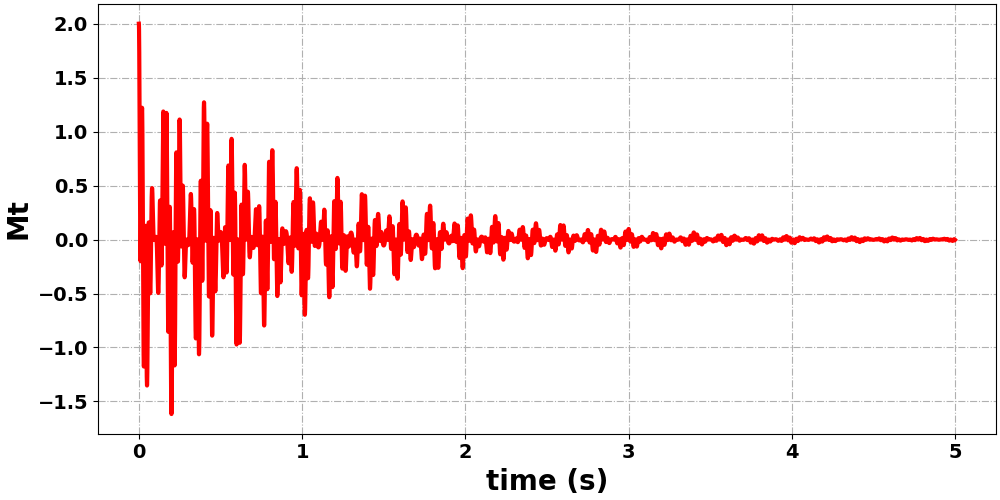

In [31]:
plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.Plotting_SpanSelector(t,Mt,"time (s)","Mt","red") 

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7fd579b99b50>)

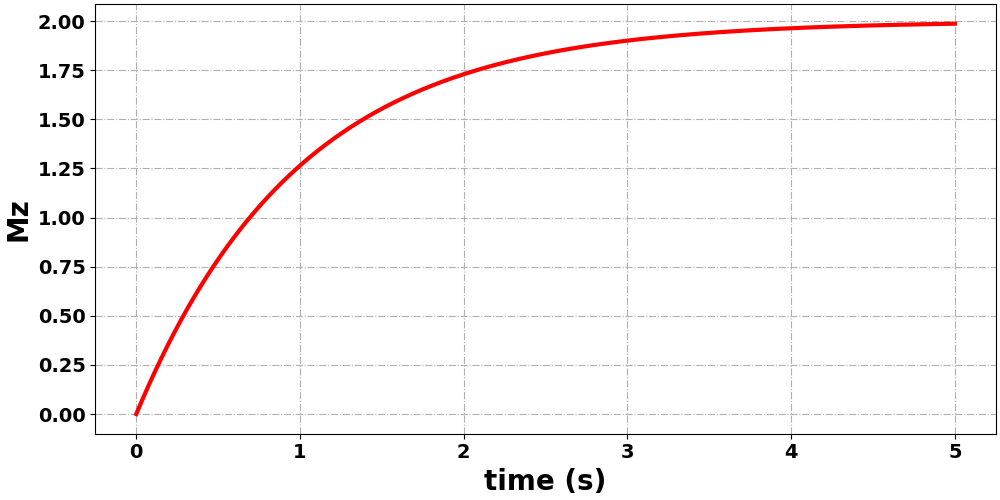

In [32]:
plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.Plotting_SpanSelector(t,Mz,"time (s)","Mz","red") 

## Fourier Transform

In [33]:
freq, spectrum = Spro.FourierTransform(Mt,QS.AcqFS,5)

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7fd579c1e8d0>)

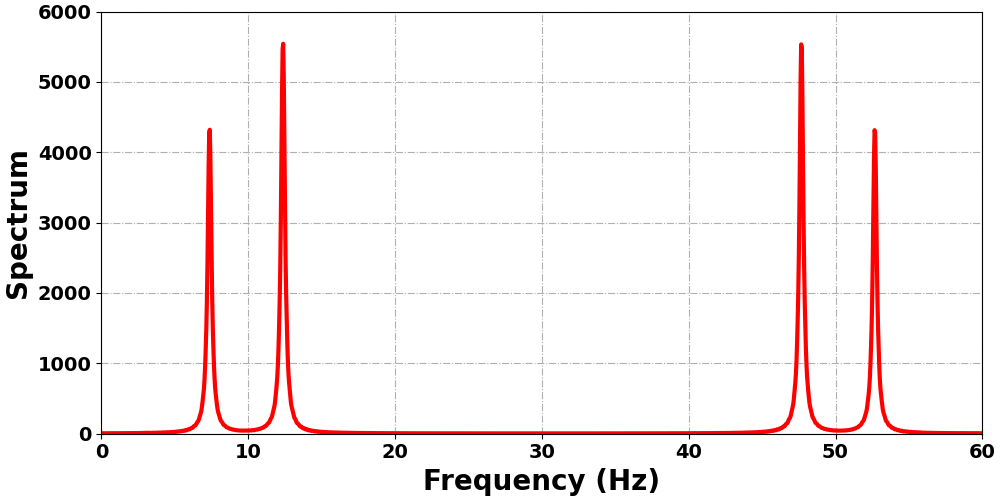

In [34]:
plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.PlotXlimt= (0,60)
plot.PlotYlimt= (0,6000)
plot.Plotting_SpanSelector(freq,spectrum,"Frequency (Hz)","Spectrum","red")